In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data/__results__.html
/kaggle/input/salary-data/__resultx__.html
/kaggle/input/salary-data/__notebook__.ipynb
/kaggle/input/salary-data/__output__.json
/kaggle/input/salary-data/custom.css
/kaggle/input/salary-data/__results___files/__results___7_1.png
/kaggle/input/salary-data/__results___files/__results___8_1.png
/kaggle/input/santander-customer/heart_disease_uci.csv
/kaggle/input/santander-customer/diabetes_DT.csv
/kaggle/input/santander-customer/titanic_train.csv
/kaggle/input/santander-customer/Santander Customer Satisfaction_train.csv
/kaggle/input/house-price-pred/house_price_train.csv


In [4]:
# import pandas as pd 
import numpy as np
df=pd.read_csv('/kaggle/input/santander-customer/heart_disease_uci.csv')
duplicate_features=[]
quaisi_constant=[]
#One-Hot encoding 
df_cleaned=pd.get_dummies(df)
for col in df_cleaned.columns:
    if np.var(df_cleaned[col])==0:
        duplicate_features.append(col)

for col in df.columns:
    top_freq=df[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quaisi_constant.append(col)
        
print(quaisi_constant)
print(duplicate_features)
print(df.head())

[]
[]
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
df2=pd.read_csv('/kaggle/input/santander-customer/diabetes_DT.csv')
duplicate_features=[]
#One-Hot Encoding 
df2_cleaned1=pd.get_dummies(df2)
duplicate_features=[]
for col in df2_cleaned1.columns:
    if np.var(df2_cleaned1[col])==0:
        duplicate_features.append(col)

print(duplicate_features)


        

In [ ]:
import pandas as pd
import numpy as np

# Sample data with 2 constant features
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],        # Varying
    "B": [10, 10, 10, 10, 10],   # Constant
    "C": ["X", "X", "X", "X", "X"], # Constant categorical
    "D": [5, 6, 7, 8, 9]         # Varying
})

print("Original DataFrame:\n", df)

# One-hot encode
df_cleaned = pd.get_dummies(df)
print(df_cleaned)
# Detect constant features
constant_features = []
for col in df_cleaned.columns:
    if np.var(df_cleaned[col], ddof=0) == 0:
        constant_features.append(col)

print("\nConstant Features:", constant_features)


In [ ]:
quasi_constant = []
for col in df2_cleaned1.columns:
    top_freq = df2_cleaned1[col].value_counts(normalize=True).max()
    if top_freq > 0.95:
        quasi_constant.append(col)

print("Quasi-constant features:", quasi_constant)


In [ ]:
quasi_constant=[]
for col in df_cleaned.columns:
    top_freq=df_cleaned[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quasi_constant.append(col)

print(quasi_constant)     #Santander Dataset Quasi_Constant Features 

In [ ]:
#Duplicate Features in Santander DAtaset 
duplicate_features=[]

for i in range(len(df_cleaned.columns)):
    for j in range(i+1,len(df_cleaned.columns)):
        if df_cleaned.iloc[:,i].equals(df_cleaned.iloc[:,j]):
            duplicate_featues.append(df_cleaned.columns[j])
print(duplicate_features)

In [ ]:
#Duplocate features in Santander dataset 
dff=pd.read_csv('/kaggle/input/santander-customer/Santander Customer Satisfaction_train.csv')
df_cleaned=pd.get_dummies(dff)
constant_features=[]
quasi_constant=[]
duplicate_features=[]

for col in df_cleaned.columns:
    if np.var(df_cleaned[col].values)==0:
        constant_features.append(col)

print(constant_features)

for col in df_cleaned.columns:
    top_freq = df_cleaned[col].value_counts(normalize=True).max()
    if top_freq>=0.95:
        quasi_constant.append(col)
print()
print(quasi_constant)

for i in range(len(df_cleaned.columns)):
    for j in range(i+1,len(df_cleaned.columns)):
        if df_cleaned.iloc[:,i].equals(df_cleaned.iloc[:,j]):
            duplicate_features.append(df_cleaned.columns[j])

print()
print(duplicate_features)




In [ ]:
#Coorelation for Heart Diesease 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Handling null values
cols_null=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        cols_null.append(col)
  
df=pd.get_dummies(df) #One-hot encoding 
X=df.drop(['id','num','trestbps', 'chol', 'thalch', 'oldpeak', 'ca'],axis=1)
y=df['num']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
corr_matrix=X_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Corr_cols=set()
threshold=0.85

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            Corr_cols.add(corr_matrix.columns[j])


print(Corr_cols)

X_train=X_train.drop(list(Corr_cols),axis=1)




{'sex_Female', 'exang_False'}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Assuming 'X' and 'y' are your feature DataFrame and target Series
mi_scores = mutual_info_classif(X, y)

# 2. Create a pandas Series for easy plotting
# This pairs each feature name with its MI score
mi_scores_series = pd.Series(mi_scores,index=X.columns)

mi_scores_series = mi_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
 # Adjust size as needed
plt.figure(figsize=(10,8))
sns.barplot(x=mi_scores_series,y=X.columns)

selector=SelectKBest(mutual_info_classif,k=4)
selector.fit(X_train,y_train)
selected_features=X_train.columns[selector.get_support()]

print(selected_features)

In [ ]:
#ANOVA ==> Analysis of Variance 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Assuming 'X' and 'y' are your feature DataFrame and target Series

# 1. Calculate ANOVA F-scores
# f_classif returns F-scores and their corresponding p-values
# We only need the F-scores for this plot
f_scores, p_values = f_classif(X, y)

# 2. Create a pandas Series for easy plotting
f_scores_series = pd.Series(f_scores, name="F-Scores", index=X.columns)

# 3. Sort the scores in descending order
f_scores_series = f_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.barplot(x=f_scores_series, y=f_scores_series.index)
plt.title("ANOVA F-Scores for Features")
plt.xlabel("F-Score (Higher is Better)")
plt.ylabel("Features")
plt.show()

selector=SelectKBest(f_classif,k=4)
selector.fit(X,y)
selected_features=X.columns[selector.get_support()]
print(selected_features)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Assuming 'X' contains only non-negative features and 'y' is your target Series

# 1. Calculate Chi-square scores
# chi2 returns the scores and their corresponding p-values
chi_scores, p_values = chi2(X, y)

# 2. Create a pandas Series for easy plotting
chi_scores_series = pd.Series(chi_scores, index=X.columns)

# 3. Sort the scores in descending order
chi_scores_series = chi_scores_series.sort_values(ascending=False)

# 4. Plot the scores as a bar chart
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.barplot(x=chi_scores_series, y=chi_scores_series.index)
plt.title("Chi-Square Scores for Features")
plt.xlabel("Chi-Square Score (Higher is Better)")
plt.ylabel("Features")
plt.show()

selector=SelectKBest(chi2,k=4)
selector.fit(X_train,y_train)

selected_features=X_train.columns[selector.get_support()]

print(selected_features)

In [ ]:
#AUC-ROC curve 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your feature DataFrame and multiclass target Series

auc_scores = {}

for feature in X.columns:
    X_single_feature = X[[feature]]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_single_feature, y, test_size=0.3, random_state=42
    )
    
    model = DecisionTreeClassifier(max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # --- CHANGE 1: Get probabilities for ALL classes ---
    # Remove the [:, 1] to pass the full probability matrix
    y_pred_proba = model.predict_proba(X_test)
    
    # --- CHANGE 2: Add the multi_class parameter ---
    score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    auc_scores[feature] = score

# Convert to a Series and sort
auc_scores_series = pd.Series(auc_scores).sort_values(ascending=False)

# Display and plot the results
print("Univariate ROC-AUC Scores (Multiclass) ")
print(auc_scores_series)

auc_scores_series.plot.barh(figsize=(10, 8))
plt.title("Univariate Feature Performance (ROC-AUC)")
plt.xlabel("ROC-AUC Score (One-vs-Rest)")
plt.show()

In [7]:
#Wrapper methods 
#Sequencial Forward Feature Selection 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS ,ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
sfs=SFS(clf,k_features=5,forward=False,floating=False,scoring="accuracy",cv=3,n_jobs=-1)
sfs.fit(X_train_scaled,y_train)

print(sfs.k_feature_names_)

print(sfs.k_score_) 

sfs_X_train=sfs.transform(X_train_scaled)
sfs_X_test=sfs.transform(X_test_scaled)

clf.fit(sfs_X_train,y_train)

print(clf.score(sfs_X_test,y_test))

('3', '4', '9', '12', '17')
0.5450119539230601
0.5688405797101449


In [ ]:
#Exhaustive feature selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
clf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
efs=EFS(clf,min_features=1,max_features=5,scoring='accuracy',cv=3,n_jobs=-1)
efs.fit(X_train_scaled,y_train)

print(efs.best_feature_names_)

print(efs.best_score_)

efs_X_train=efs.transform(X_train_scaled)
efs_X_test=efs.transform(X_test_scaled)

clf.fit(efs_X_train,y_test)

print(clf.score(sfs_X_test,y_test))

In [ ]:
#Recursive feature Elimination
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rfe=RFE(estimator=clf,n_features_to_select=5)
rfe.fit(X_train_scaled,y_train)
y_pred=rfe.predict(X_test_scaled)
selected_features = X_train.columns[rfe.support_]
print(selected_features.tolist())
print(accuracy_score(y_test,y_pred))

In [13]:
# ------------ Import Libraries ------------
from sklearn.datasets import load_diabetes, load_wine
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================================================================
# 1. Regularization on Diabetes Dataset
# ================================================================
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
df_X = pd.DataFrame(X, columns=feature_names)

# ---------------- LASSO ----------------
lasso = Lasso(alpha=0.1).fit(X, y)
mask_lasso = lasso.coef_ != 0
X_lasso = df_X.loc[:, mask_lasso]

print("----- LASSO -----")
print("LASSO Coefficients:", lasso.coef_)
print("Original shape:", df_X.shape)
print("Reduced shape (LASSO):", X_lasso.shape)
print("Features Kept by LASSO:", list(X_lasso.columns))
print()

# ---------------- RIDGE ----------------
ridge = Ridge(alpha=1.0).fit(X, y)
mask_ridge = ridge.coef_ != 0   # Ridge rarely gives exactly 0
X_ridge = df_X.loc[:, mask_ridge]

print("----- RIDGE -----")
print("Ridge Coefficients:", ridge.coef_)
print("Original shape:", df_X.shape)
print("Reduced shape (Ridge):", X_ridge.shape)
print("Features Kept by Ridge:", list(X_ridge.columns))
print()

# ---------------- ELASTIC NET ----------------
enet = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)
mask_enet = enet.coef_ != 0
X_enet = df_X.loc[:, mask_enet]

print("----- ELASTIC NET -----")
print("Elastic Net Coefficients:", enet.coef_)
print("Original shape:", df_X.shape)
print("Reduced shape (Elastic Net):", X_enet.shape)
print("Features Kept by Elastic Net:", list(X_enet.columns))
print()


----- LASSO -----
LASSO Coefficients: [  -0.         -155.3599757   517.18679544  275.07723537  -52.53936509
   -0.         -210.1579914     0.          483.91264753   33.67396468]
Original shape: (442, 10)
Reduced shape (LASSO): (442, 7)
Features Kept by LASSO: ['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']

----- RIDGE -----
Ridge Coefficients: [  29.46611189  -83.15427636  306.35268015  201.62773437    5.90961437
  -29.51549508 -152.04028006  117.3117316   262.94429001  111.87895644]
Original shape: (442, 10)
Reduced shape (Ridge): (442, 10)
Features Kept by Ridge: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

----- ELASTIC NET -----
Elastic Net Coefficients: [ 10.28633208   0.28598338  37.46465473  27.54476518  11.10885591
   8.3558916  -24.12080871  25.50549197  35.46569979  22.89498509]
Original shape: (442, 10)
Reduced shape (Elastic Net): (442, 10)
Features Kept by Elastic Net: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']



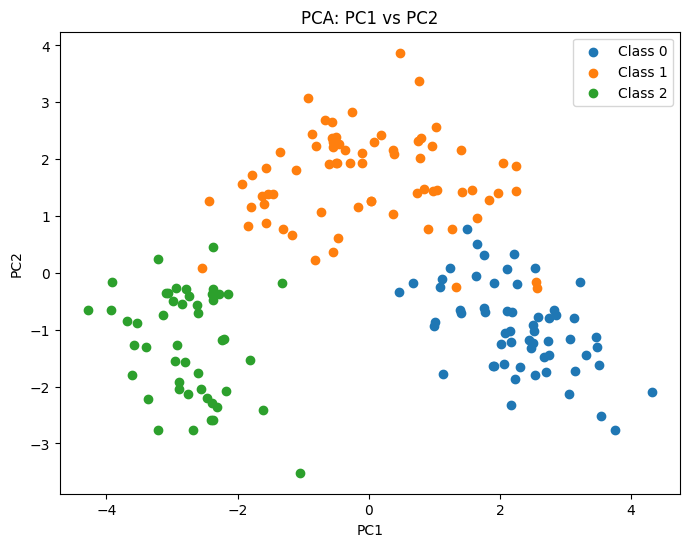

Feature loadings on PC1 and PC2:
                                   PC1       PC2
flavanoids                    0.422934  0.003360
total_phenols                 0.394661 -0.065040
od280/od315_of_diluted_wines  0.376167  0.164496
proanthocyanins               0.313429 -0.039302
hue                           0.296715  0.279235
proline                       0.286752 -0.364903
alcohol                       0.144329 -0.483652
magnesium                     0.141992 -0.299634
ash                          -0.002051 -0.316069
color_intensity              -0.088617 -0.529996
alcalinity_of_ash            -0.239320  0.010591
malic_acid                   -0.245188 -0.224931
nonflavanoid_phenols         -0.298533 -0.028779
Variance explained by PC1: 0.3619884809992633
Variance explained by PC2: 0.1920749025700898
Number of PCs to explain >80% variance: 5


In [17]:
# ================================================================
# 2. PCA on Wine Dataset
# ================================================================
from sklearn.decomposition import PCA

wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca[y==label,0], X_pca[y==label,1], label=f'Class {label}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.legend()
plt.show()

# Feature loadings
loadings = pd.DataFrame(pca.components_.T, index=feature_names, columns=['PC1','PC2'])
print("Feature loadings on PC1 and PC2:")
print(loadings.sort_values(by='PC1', ascending=False))

# Variance explained
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]}")
print(f"Variance explained by PC2: {explained_variance[1]}")

# PCs needed for >80% variance
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_pcs_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of PCs to explain >80% variance: {num_pcs_80}")

In [14]:
# Linear Regression on House Price Prediction

# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 2. Load dataset
df = pd.read_csv("/kaggle/input/house-price-pred/house_price_train.csv")

# 3. Handle missing values
# Option 1: Drop rows with missing values (simple for learning)
Nans=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        Nans.append(col)


for col in Nans:
    if df[col].dtype in ['float64', 'int64']:  # Numeric columns
        df[col].fillna(df[col].mean(), inplace=True)
    else:  # Categorical columns
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        
        
        

# 4. Convert categorical variables to numeric (one-hot encoding)
df = pd.get_dummies(df)

# 5. Define features (X) and target (y)
X = df.drop("SalePrice", axis=1)   # independent variables
y = df["SalePrice"]                # dependent variable

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 8. Predictions
y_pred = lr.predict(X_test)

# 9. Intercept and Slopes
print("Intercept (w0):", lr.intercept_)
print("\nSlopes / Coefficients (w):")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.2f}")

# 10. Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Intercept (w0): -384135.733840041

Slopes / Coefficients (w):
Id: 0.54
MSSubClass: 13.30
LotFrontage: 11.74
LotArea: 0.67
OverallQual: 6548.19
OverallCond: 5809.47
YearBuilt: 312.83
YearRemodAdd: 135.68
MasVnrArea: 18.06
BsmtFinSF1: 16.84
BsmtFinSF2: 6.71
BsmtUnfSF: -1.46
TotalBsmtSF: 22.09
1stFlrSF: 16.40
2ndFlrSF: 32.80
LowQualFinSF: -23.88
GrLivArea: 25.31
BsmtFullBath: 1695.28
BsmtHalfBath: -2404.62
FullBath: 2916.95
HalfBath: 2170.07
BedroomAbvGr: -2613.01
KitchenAbvGr: -12397.45
TotRmsAbvGrd: 1880.78
Fireplaces: 2849.74
GarageYrBlt: 19.34
GarageCars: 384.89
GarageArea: 26.34
WoodDeckSF: 16.88
OpenPorchSF: 0.04
EnclosedPorch: -5.78
3SsnPorch: 48.75
ScreenPorch: 32.56
PoolArea: 81.66
MiscVal: 1.97
MoSold: -444.59
YrSold: -347.77
MSZoning_C (all): -17378.94
MSZoning_FV: 11325.69
MSZoning_RH: 1928.07
MSZoning_RL: 2777.46
MSZoning_RM: 1347.72
Street_Grvl: -11188.10
Street_Pave: 11188.10
Alley_Grvl: -2418.99
Alley_Pave: 2418.99
LotShape_IR1: -4245.39
LotShape_IR2: 3344.12
LotShape_IR3:

/tmp/ipykernel_36/2650783486.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_36/2650783486.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load dataset (ensure Salary_Data.csv is in your working directory)
df = pd.read_csv("/kaggle/input/salary-data/Salary_Data.csv")
print(df.head())

# 3. Define independent and dependent variables
X = df[['YearsExperience']]   # Independent variable
y = df['Salary']              # Dependent variable

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Get intercept & slope
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (b0): {intercept:.2f}")
print(f"Slope (b1): {slope:.2f}")

print(f"\nInterpretation: For each additional year of experience, salary increases by approximately {slope:.2f} units.")

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Plot regression line
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience (Linear Regression)")
plt.legend()
plt.show()


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 1.0


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 1.0


In [20]:
from sklearn.svm import SVC

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred))


SVM Accuracy: 1.0


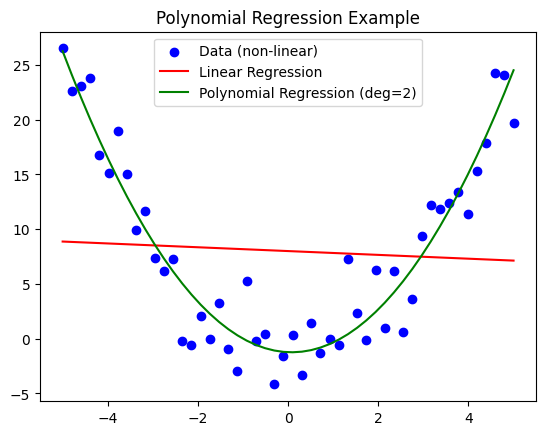

Linear Regression MSE: 75.26119223792234
Polynomial Regression MSE: 7.1781570706824445


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 1. Create Non-linear Data (y = x^2 + noise)
np.random.seed(42)
X = np.linspace(-5, 5, 50).reshape(-1, 1)
y = X**2 + np.random.randn(50, 1) * 3   # quadratic with noise

# 2. Fit Linear Regression (baseline, will underfit)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)

# 3. Fit Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

# 4. Plot results
plt.scatter(X, y, color="blue", label="Data (non-linear)")
plt.plot(X, y_lin_pred, color="red", label="Linear Regression")
plt.plot(X, y_poly_pred, color="green", label="Polynomial Regression (deg=2)")
plt.legend()
plt.title("Polynomial Regression Example")
plt.show()

# 5. Performance
print("Linear Regression MSE:", mean_squared_error(y, y_lin_pred))
print("Polynomial Regression MSE:", mean_squared_error(y, y_poly_pred))


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)   #Logistic Regression 
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
                    
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
[[ 61   2]
 [  2 106]]
Accuracy: 0.9766081871345029
Precision: 0.9814814814814815
Recall (Sensitivity): 0.9814814814814815
F1 Score: 0.9814814814814815
ROC AUC Score: 0.9748677248677248

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



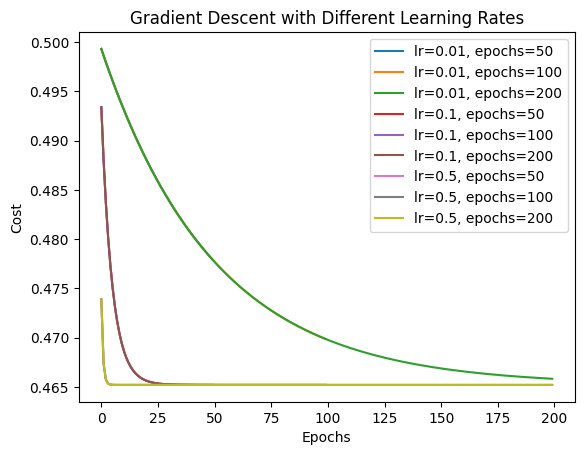

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/house-price-pred/house_price_train.csv")

# Use LotArea as feature (X) and SalePrice as target (y)
X = df['LotArea'].values
y = df['SalePrice'].values

# Normalize (for stable training)
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Reshape and add bias term (1 column)
X = X.reshape(-1, 1)
X = np.c_[np.ones(X.shape[0]), X]   # adds a column of 1s

# Prediction function
def predict(X, theta):
    return X.dot(theta)

# Cost function (Mean Squared Error / 2)
def cost(X, y, theta):
    return np.mean((predict(X, theta) - y) ** 2) / 2

# Gradient Descent
def gradient_descent(X, y, alpha, epochs):
    theta = np.zeros(X.shape[1])   # initialize [0,0]
    m = len(y)
    history = []
    
    for _ in range(epochs):
        theta -= alpha * (1/m) * X.T.dot(predict(X, theta) - y)
        history.append(cost(X, y, theta))
    
    return theta, history

# Try different learning rates and epochs
learning_rates = [0.01, 0.1, 0.5]
epochs = [50, 100, 200]

for lr in learning_rates:
    for ep in epochs:
        theta, history = gradient_descent(X, y, alpha=lr, epochs=ep)
        plt.plot(history, label=f"lr={lr}, epochs={ep}")

plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Gradient Descent with Different Learning Rates")
plt.legend()
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. Load dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Fit models
# 5.a Linear Regression (no regularization)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 5.b LASSO (L1 regularization)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# 5.c Ridge (L2 regularization)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 6. Display coefficients and MSE
df_coef = pd.DataFrame({
    'Feature': feature_names,
    'LinearRegression': lr.coef_,
    'LASSO': lasso.coef_,
    'Ridge': ridge.coef_
})from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

data=load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
X=df.drop("target",axis=1)
df['target_class']=(df['target']>df['target'].mean()).astype(int)
y=df["target_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf=DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=["Low", "High"])
plt.show()


#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
data={"Age": [25, 45, 35, 50, 23, 40],
    "Income": [50000, 100000, 75000, 120000, 40000, 90000],
    "Loan_Status": ["Yes", "No", "Yes", "No", "Yes", "No"]}
df=pd.DataFrame(data)
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Income']],df['Loan_Status'],test_size=0.3,random_state=42)
model=GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print("Prediction:",pred)
print("Actual value:",y_test.values)
print("Accuracy:",model.score(X_test,y_test))



print("Coefficients comparison:")
print(df_coef)
print("\nMSE:")
print(f"Linear Regression: {mse_lr:.4f}")
print(f"LASSO: {mse_lasso:.4f}")
print(f"Ridge: {mse_ridge:.4f}")


Coefficients comparison:
                         Feature  LinearRegression     LASSO     Ridge
0                        alcohol         -0.088466 -0.000000 -0.087675
1                     malic_acid          0.048293  0.000000  0.048294
2                            ash         -0.056075 -0.000000 -0.057265
3              alcalinity_of_ash          0.146622  0.079245  0.146796
4                      magnesium          0.000537 -0.000000  0.001067
5                  total_phenols          0.094994 -0.000000  0.085711
6                     flavanoids         -0.351976 -0.251218 -0.338252
7           nonflavanoid_phenols         -0.039738  0.000000 -0.036780
8                proanthocyanins          0.010043 -0.000000  0.008247
9                color_intensity          0.177598  0.000000  0.174569
10                           hue         -0.020820 -0.066581 -0.024681
11  od280/od315_of_diluted_wines         -0.199330 -0.207245 -0.199863
12                       proline         -0.218957 -

Accuracy: 0.7218045112781954


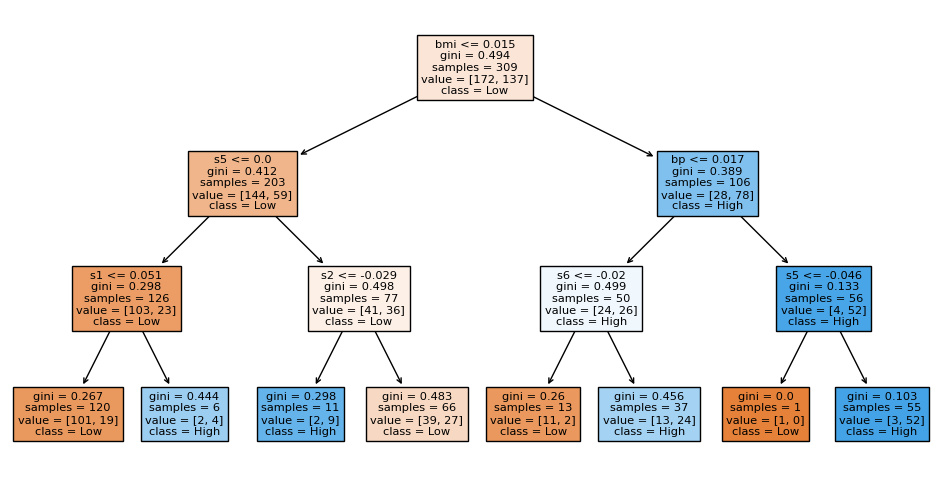

Prediction: ['Yes' 'No']
Actual value: ['Yes' 'No']
Accuracy: 1.0


In [8]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

data=load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
X=df.drop("target",axis=1)
df['target_class']=(df['target']>df['target'].mean()).astype(int)
y=df["target_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf=DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=["Low", "High"])
plt.show()


#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
data={"Age": [25, 45, 35, 50, 23, 40],
    "Income": [50000, 100000, 75000, 120000, 40000, 90000],
    "Loan_Status": ["Yes", "No", "Yes", "No", "Yes", "No"]}
df=pd.DataFrame(data)
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Income']],df['Loan_Status'],test_size=0.3,random_state=42)
model=GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print("Prediction:",pred)
print("Actual value:",y_test.values)
print("Accuracy:",model.score(X_test,y_test))


